## データ準備

In [147]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.api import qqplot
from statsmodels.stats.power import TTestIndPower
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = sns.load_dataset('tips')
df['tip_rate'] = df.apply(lambda row: row['tip'] / row['total_bill'], axis=1)

## 分布の描画

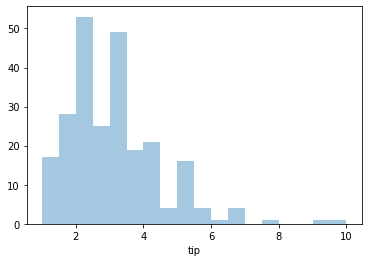

In [3]:
sns.distplot(df['tip'], kde=False)

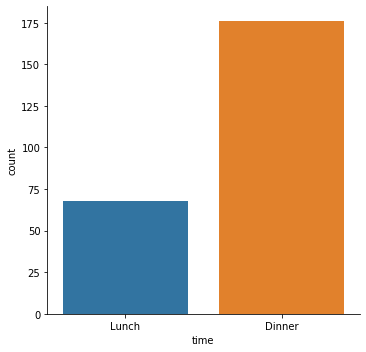

In [4]:
sns.catplot('time', data=df, kind='count')

## 平均値

In [5]:
np.mean(df['tip'])

2.9982786885245902

In [6]:
df['tip_rate'].mean()

0.16080258172250478

In [7]:
df.groupby(by='sex')['tip_rate'].mean()

sex
Male      0.157651
Female    0.166491
Name: tip_rate, dtype: float64

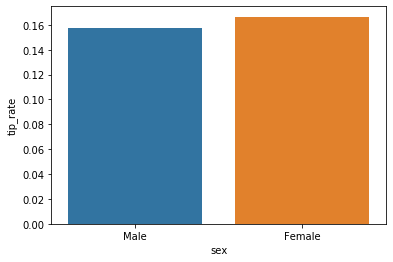

In [8]:
sns.barplot('sex', 'tip_rate', data=df, ci=None)

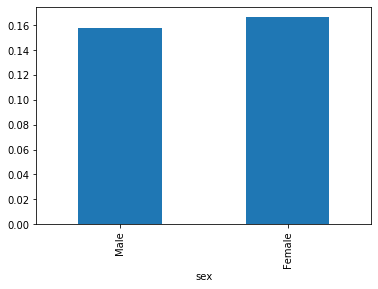

In [9]:
df.groupby(by='sex').mean()['tip_rate'].plot(kind='bar')

## 中央値

In [10]:
np.median(df['tip_rate'])

0.15476977125802577

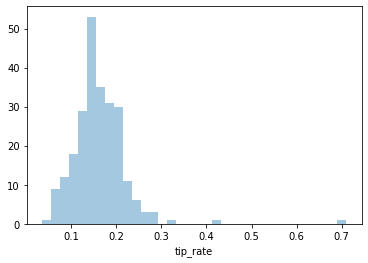

In [11]:
sns.distplot(df['tip_rate'], kde=False)

In [12]:
df['tip_rate'].median()

0.15476977125802577

In [13]:
df.groupby(by='sex').median()['tip_rate']

sex
Male      0.153492
Female    0.155581
Name: tip_rate, dtype: float64

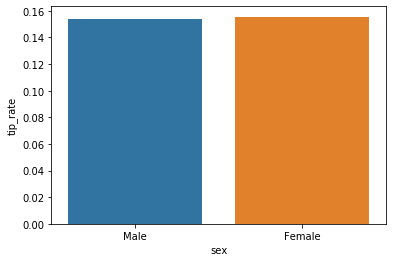

In [14]:
sns.barplot(x='sex', y='tip_rate', data=df, estimator=np.median, ci=None)

In [15]:
df.sort_values(by='tip_rate', ascending=False)

,total_bill,tip,sex,smoker,day,time,size,tip_rate
172,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345
178,9.60,4.00,Female,Yes,Sun,Dinner,2,0.416667
67,3.07,1.00,Female,Yes,Sat,Dinner,1,0.325733
232,11.61,3.39,Male,No,Sat,Dinner,2,0.291990
183,23.17,6.50,Male,Yes,Sun,Dinner,4,0.280535
...,...,...,...,...,...,...,...,...
187,30.46,2.00,Male,Yes,Sun,Dinner,5,0.065660
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
57,26.41,1.50,Female,No,Sat,Dinner,2,0.056797
102,44.30,2.50,Female,Yes,Sat,Dinner,3,0.056433


## 最頻値

In [16]:
mode, count = stats.mode(df)

In [17]:
print(mode)
print(count)

[[13.42 2.0 'Male' 'No' 'Sat' 'Dinner' 2 0.1448225923244026]]
[[  3  33 157 151  87 176 156   2]]


In [18]:
df['size'].mode()

0    2
dtype: int64

In [19]:
mode, count = stats.mode(df['size'])
print(mode, count)

[2] [156]


In [20]:
df['tip_rate'].mode()

0    0.144823
1    0.153846
dtype: float64

In [21]:
# 試しに最頻値のデータを参照
df[(df['tip_rate'] == df['tip_rate'].mode()[0]) | (df['tip_rate'] == df['tip_rate'].mode()[1])]

,total_bill,tip,sex,smoker,day,time,size,tip_rate
61,13.81,2.0,Male,Yes,Sat,Dinner,2,0.144823
163,13.81,2.0,Male,No,Sun,Dinner,2,0.144823
198,13.00,2.0,Female,Yes,Thur,Lunch,2,0.153846
202,13.00,2.0,Female,Yes,Thur,Lunch,2,0.153846


## 範囲

In [22]:
np.min(df['tip'])

1.0

In [23]:
df['tip'].min()

1.0

In [24]:
df.groupby(by='sex').min()

,total_bill,tip,size,tip_rate
sex,,,,
Male,7.25,1.0,1,0.035638
Female,3.07,1.0,1,0.056433


In [25]:
np.max(df['tip'])

10.0

In [26]:
df['tip'].max()

10.0

In [27]:
df.groupby(by='sex').max()

,total_bill,tip,size,tip_rate
sex,,,,
Male,50.81,10.0,6,0.710345
Female,44.30,6.5,6,0.416667


## 四分位数

In [28]:
np.quantile(df['tip_rate'], [0.25, 0.5, 0.75])

array([0.12912736, 0.15476977, 0.19147549])

In [29]:
quant_range = [0.25, 0.5, 0.75]
df['tip_rate'].quantile(quant_range)

0.25    0.129127
0.50    0.154770
0.75    0.191475
Name: tip_rate, dtype: float64

In [30]:
stats.iqr(df['tip_rate'])

0.06234812458689154

In [31]:
0.191475 - 0.129127

0.062348000000000015

In [32]:
qd = stats.iqr(df['tip_rate']) / 2
qd

0.03117406229344577

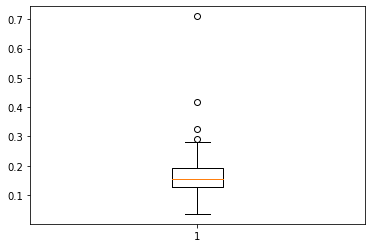

In [33]:
plt.boxplot(df['tip_rate'])
plt.show()

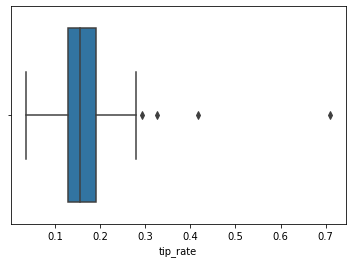

In [34]:
sns.boxplot(df['tip_rate'])

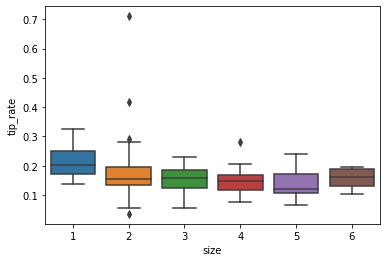

In [35]:
sns.boxplot(x='size', y='tip_rate', data=df)

## 分散

In [36]:
np.var(df['tip_rate'])

0.0037145280013546928

In [37]:
np.var(df['tip'])

1.9066085124966428

## 標準偏差

In [38]:
np.std(df['tip'])

1.3807999538298958

In [39]:
np.sqrt(np.var(df['tip']))

1.3807999538298958

In [40]:
tip_mean = np.mean(df['tip'])
tip_mean

2.9982786885245902

## 共分散

In [41]:
np.cov(df['total_bill'], df['tip'], bias=True)

array([[78.92813149,  8.28938892],
       [ 8.28938892,  1.90660851]])

In [42]:
x = np.stack([df['total_bill'], df['tip'], df['size']], axis=0) # 行が変数、列が各値でないとダメらしい
np.cov(x, bias=True)

array([[78.92813149,  8.28938892,  5.04522121],
       [ 8.28938892,  1.90660851,  0.64126747],
       [ 5.04522121,  0.64126747,  0.9008835 ]])

## 相関係数

In [43]:
np.corrcoef(df['total_bill'], df['tip'])

array([[1.        , 0.67573411],
       [0.67573411, 1.        ]])

In [44]:
x = np.stack([df['total_bill'], df['tip'], df['size']], axis=0)
np.corrcoef(x)

array([[1.        , 0.67573411, 0.59831513],
       [0.67573411, 1.        , 0.48929878],
       [0.59831513, 0.48929878, 1.        ]])

In [45]:
x.shape

(3, 244)

In [46]:
df.corr()

,total_bill,tip,size,tip_rate
total_bill,1.000000,0.675734,0.598315,-0.338624
tip,0.675734,1.000000,0.489299,0.342370
size,0.598315,0.489299,1.000000,-0.142860
tip_rate,-0.338624,0.342370,-0.142860,1.000000


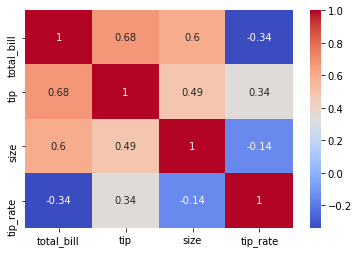

In [47]:
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

## 連関

In [48]:
pd.crosstab(df['sex'], df['time'])

time,Lunch,Dinner
sex,,
Male,33,124
Female,35,52


In [49]:
cont_table = _
# 第一引数がχ2、第四引数が期待度数の分割表
stats.chi2_contingency(cont_table, correction=False)

(10.277251918677742,
 0.0013468039268008766,
 1,
 array([[ 43.75409836, 113.24590164],
        [ 24.24590164,  62.75409836]]))

## クラメールの連関係数

In [50]:
# def cramer_v(x, y):
#     cont_table = pd.crosstab(x, y)
#     chi2 = stats.chi2_contingency(cont_table, correction=False)[0]
#     num_min = np.min([x.nunique(), y.nunique()])
#     V = np.sqrt(chi2 / (num_min - 1) * x.count())
    
#     return V


def cramer_v(x, y):
    cont_table = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(cont_table, correction=False)[0]
    min_d = min(cont_table.shape)
    n = len(x)
    v = np.sqrt(chi2/((min_d-1)*n))
    return v

In [51]:
cramer_v(df['sex'], df['time'])

0.20523129613344476

## 確率分布

In [52]:
# random variate(rvs): 確率変量
stats.randint.rvs(1, 7)

6

In [53]:
stats.randint(1, 7).rvs()

6

In [54]:
stats.uniform.rvs(0, 1)

0.1991606948952579

In [55]:
stats.uniform(0, 1).rvs()

0.9412255502011755

## 確率分布の描画

In [56]:
def simple_func(x):
    return 2*x + 3

In [57]:
simple_func(10)

23

In [58]:
x = np.linspace(-3, 3, 100)
y = simple_func(x)

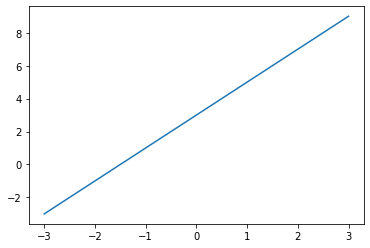

In [59]:
plt.plot(x, y)

In [60]:
# 離散型確率分布
stats.randint(1, 7).pmf(4)

0.16666666666666666

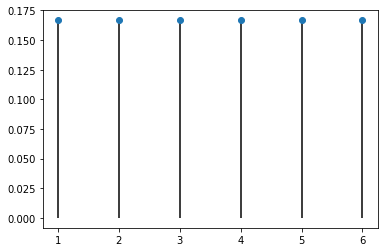

In [61]:
x = np.arange(1, 7)
y = stats.randint(1, 7).pmf(x)
plt.plot(x, y, 'o')
plt.vlines(x, 0, y)

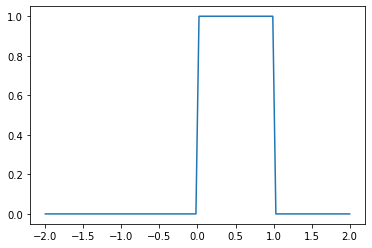

In [62]:
# 連続型確率分布
x = np.linspace(-2, 2, 100)
y = stats.uniform(loc=0, scale=1).pdf(x)
plt.plot(x, y)

## 累積分布関数

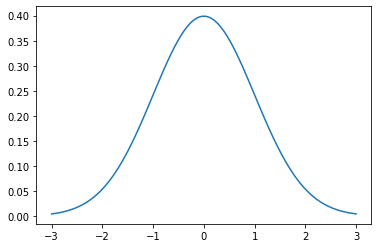

In [63]:
x = np.linspace(-3, 3, 100)
y = stats.norm.pdf(x)
plt.plot(x, y)

In [64]:
y = stats.norm.cdf(x)
y

array([0.0013499 , 0.00164427, 0.00199603, 0.00241482, 0.00291159,
       0.00349868, 0.00418999, 0.00500104, 0.00594906, 0.00705314,
       0.00833425, 0.00981533, 0.01152131, 0.01347915, 0.01571778,
       0.01826811, 0.02116287, 0.02443656, 0.02812518, 0.03226612,
       0.03689778, 0.04205935, 0.04779035, 0.0541303 , 0.06111818,
       0.06879198, 0.07718815, 0.08634102, 0.09628221, 0.10704004,
       0.11863893, 0.13109879, 0.14443448, 0.15865525, 0.17376426,
       0.18975815, 0.20662669, 0.2243525 , 0.24291088, 0.26226972,
       0.28238953, 0.30322357, 0.32471814, 0.34681289, 0.36944134,
       0.39253143, 0.41600624, 0.43978468, 0.46378241, 0.48791269,
       0.51208731, 0.53621759, 0.56021532, 0.58399376, 0.60746857,
       0.63055866, 0.65318711, 0.67528186, 0.69677643, 0.71761047,
       0.73773028, 0.75708912, 0.7756475 , 0.79337331, 0.81024185,
       0.82623574, 0.84134475, 0.85556552, 0.86890121, 0.88136107,
       0.89295996, 0.90371779, 0.91365898, 0.92281185, 0.93120

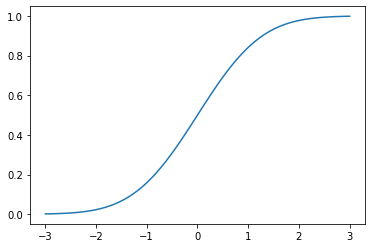

In [65]:
y = stats.norm.cdf(x)
plt.plot(x, y)

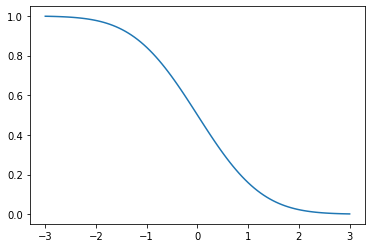

In [66]:
# 右側の面積 sf(x)は 1-CDF で求めることができる
y = stats.norm.cdf(x)
plt.plot(x, 1-y)

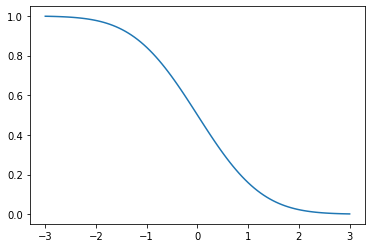

In [67]:
# 厳密な数字を求めたい場合はsf(x)を使うべきで、一般的にこちらを使用する
y = stats.norm.sf(x)
plt.plot(x, y)

## 正規分布

In [68]:
stats.norm(loc=10, scale=3).rvs()

11.018995150407104

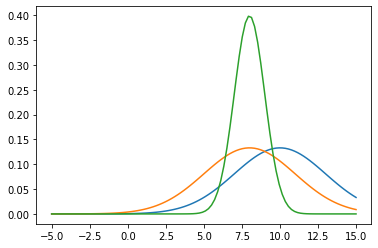

In [69]:
x = np.linspace(-5, 15, 100)
y = stats.norm(loc=10, scale=3).pdf(x)
y2 = stats.norm(loc=8, scale=3).pdf(x)
y3 = stats.norm(loc=8, scale=1).pdf(x)
plt.plot(x, y)
plt.plot(x, y2)
plt.plot(x, y3)

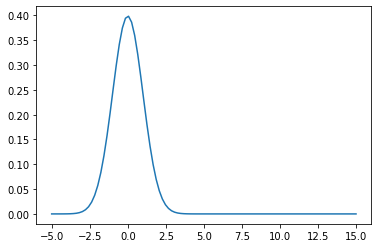

In [70]:
# 標準正規分布（平均0、分散1）
y = stats.norm.pdf(x)
plt.plot(x, y)

## カーネル密度推定（KDE）

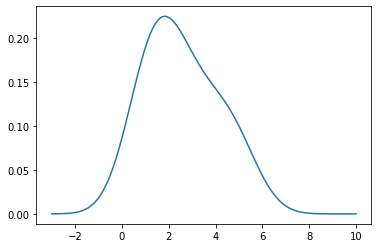

In [71]:
x = np.linspace(-3, 10, 100)
y = stats.gaussian_kde([1, 1, 2, 2, 3, 4, 5]).pdf(x)
plt.plot(x, y)

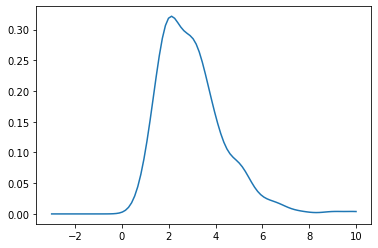

In [72]:
x = np.linspace(-3, 10, 100)
y = stats.gaussian_kde(df['tip']).pdf(x)
plt.plot(x, y)

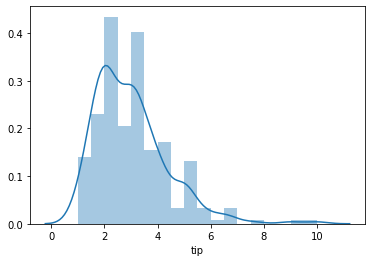

In [73]:
sns.distplot(df['tip'], kde=True)

In [74]:
resample_data = stats.gaussian_kde(df['tip']).resample()

In [75]:
resample_data

array([[ 2.16354355,  2.07211752,  3.08631965,  3.28368412,  3.31489098,
         1.71140103,  3.76049182,  6.42208268,  2.55917962,  1.98372148,
         0.82071126,  2.11161864,  3.6969659 ,  3.90578248,  2.3890266 ,
         2.96715144,  7.02808113,  0.99250748,  9.68381768,  3.67403447,
         1.59820672,  1.68805894,  2.75349903,  1.71583403,  3.45231162,
         3.69954177,  6.4120057 ,  1.71781247,  2.27612297,  4.45309449,
         2.81037223,  3.71595334,  1.41084861,  3.79497779,  1.51649139,
         2.81480447,  2.00199615,  2.81644494,  2.37254339,  3.48664978,
         3.13049164,  3.33455761,  1.78406914,  1.1481377 ,  7.76535063,
         1.80146042,  5.56407184,  2.64007472,  1.33873377,  4.0299688 ,
        10.22895267,  5.20676339,  2.36136091,  2.81103926,  5.61979221,
         1.82682593,  3.22331691,  1.31484186,  1.7833791 ,  0.72052009,
         1.60533983,  2.84682966,  3.13274011,  2.59648592,  3.44944633,
         1.60934784,  3.94410137,  3.93010244,  3.4

## 正規分布

### 68-95-99.7ルールを確かめる

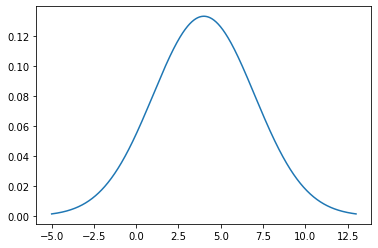

In [76]:
x = np.linspace(-5, 13, 1000)
y = stats.norm(loc=4, scale=3).pdf(x)
plt.plot(x, y)

In [77]:
# 自分の回答
norm_array = stats.norm(loc=4, scale=3).rvs(1000)
norm_std = norm_array.std()
norm_mean = norm_array.mean()

for x in range(1, 4):
    std_filtered = norm_array[(norm_array > (norm_mean - norm_std*x)) & (norm_array < (norm_mean + norm_std*x))]
    rate = len(std_filtered) / len(norm_array)
    print(f'mean ± {x}std: {rate}')

mean ± 1std: 0.678
mean ± 2std: 0.949
mean ± 3std: 0.999


In [78]:
# 講師の解答を少し改変
samples = 1000
group1 = []
group2 = []
group3 = []
loc = 4
scale = 3

for _ in range(samples):
    sample = stats.norm(loc=loc, scale=scale).rvs()
    if loc-scale < sample < loc+scale:
        group1.append(sample)
    elif loc-scale*2 < sample < loc+scale*2:
        group2.append(sample)
    elif loc-scale*3 < sample < loc+scale*3:
        group3.append(sample)
    else:
        pass
    
print(len(group1) / samples)
print((len(group2) + len(group1)) / samples)
print((len(group3) + len(group2) + len(group1)) / samples)

0.659
0.942
0.996


## 標準化

In [79]:
scaler = StandardScaler()

In [80]:
# data は二次元である必要がある(fit_transformは二次元のデータを標準化する仕様)
scaler.fit_transform([[1, 30], [2, 50], [3, 10], [4, 23]])

array([[-1.34164079,  0.12099577],
       [-0.4472136 ,  1.50380456],
       [ 0.4472136 , -1.26181302],
       [ 1.34164079, -0.36298731]])

In [81]:
df['tip_rate'].shape

(244,)

In [82]:
# df['tip_rate'].values.reshape(244, 1)
# shape がわからない場合を考え、基本的に -1 を入れれば確実
scaled = scaler.fit_transform(df['tip_rate'].values.reshape(-1, 1))

In [83]:
# 複数のデータをまとめて標準化する場合（5個目まで表示）
scaler.fit_transform(df[['total_bill', 'tip_rate']])[:5]

array([[-0.31471131, -1.66301817],
       [-1.06323531, -0.00428234],
       [ 0.1377799 ,  0.09491467],
       [ 0.4383151 , -0.34492594],
       [ 0.5407447 , -0.22962497]])

In [84]:
# tip_rateを偏差値にする（5個まで表示）
(scaled * 10 + 50)[:5]

array([[33.36981828],
       [49.95717657],
       [50.94914672],
       [46.5507406 ],
       [47.70375032]])

## 二項分布

In [85]:
# サイコロをn回振ったとき、2がx回出る確率
n = 3
x = np.arange(n+1)
y =stats.binom(n=n, p=1/6).pmf(x)
y

array([0.5787037 , 0.34722222, 0.06944444, 0.00462963])

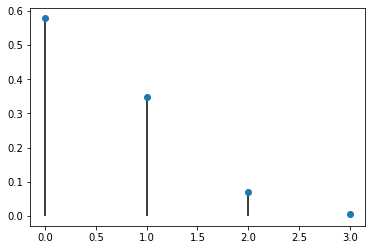

In [86]:
plt.plot(x, y, 'o')
plt.vlines(x, 0, y)

### nを大きくした二項分布を確認

平均: 16.667 vs 16.667
分散: 13.889 vs 13.889


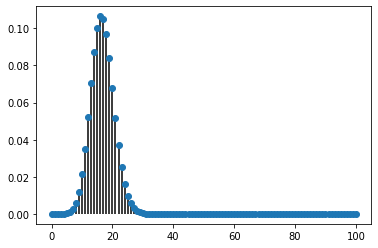

In [87]:
n = 100
p = 1/6
q = 1 - p
x = np.arange(n+1)
y = stats.binom(n=n, p=p).pmf(x)

plt.plot(x, y, 'o')
plt.vlines(x, 0, y)

mean_binom = stats.binom.mean(n=n, p=p)
var_binom = stats.binom.var(n=n, p=p)

mean_np = n * p
var_np = n * p * q

print(f'平均: {mean_binom:.3f} vs {mean_np:.3f}')
print(f'分散: {var_binom:.3f} vs {var_np:.3f}')

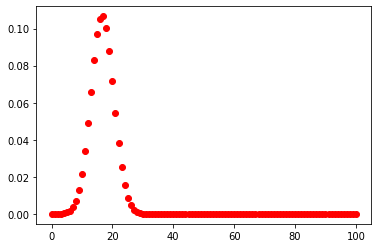

In [88]:
# 近似値を使ってプロットを確認
y2 = stats.norm(mean_np, np.sqrt(var_np)).pdf(x)
plt.plot(x, y2, 'o',  c='r')

### 標本分布を見てみよう

In [89]:
# var_list = []
# mean_list = []

# for _ in range(100):
#     samples = df.sample(50)['tip']
#     mean_list.append(samples.mean())
#     var_list.append(samples.var())

# print(f'標本平均値の平均: {np.mean(mean_list):.3f}, 標本平均値の分散: {np.mean(var_list):.3f}')
# print(f"母集団の平均: {df['tip'].mean():.3f}, 母集団の分散: {df['tip'].var():.3f}")

In [90]:
m = 100
n = 50
sample_means = []
column = 'tip'

for _ in range(m):
    samples = df.sample(n)
    sample_mean = samples[column].mean()
    sample_means.append(sample_mean)
    
# 母分散
m_var = df[column].var()
    
print(f"母集団の平均: {df[column].mean():.3f}, 母集団の分散: {m_var:.3f}")
print(f"標本平均値の平均: {np.mean(sample_means):.3f}, 標本平均の分散: {np.var(sample_means):.3f}")
print(f'σ**2/n: {m_var/n:.3f}')

母集団の平均: 2.998, 母集団の分散: 1.914
標本平均値の平均: 2.989, 標本平均の分散: 0.032
σ**2/n: 0.038


## 不偏分散

In [91]:
stats.tvar(df['tip'])

1.914454638062471

In [92]:
np.var(df['tip'])

1.9066085124966428

In [93]:
np.var(df['tip'], ddof=1)

1.9144546380624725

In [94]:
# 不偏分散の平方根
np.sqrt(stats.tvar(df['tip']))

1.3836381890011822

In [95]:
stats.tstd(df['tip'])

1.3836381890011822

In [96]:
np.std(df['tip'])

1.3807999538298958

In [97]:
np.std(df['tip'], ddof=1)

1.3836381890011826

### 不偏分散の “不偏性” を確認してみよう

In [98]:
n = 100
i = 50
column = 'tip'
uvar_list = []
var_list = []

for _ in range(n):
    samples = df.sample(i)
    sample_uvar = stats.tvar(samples[column])
    sample_var = np.var(samples[column])
    uvar_list.append(sample_uvar)
    var_list.append(sample_var)

uvar_mean = np.mean(uvar_list)
var_mean = np.mean(var_list)
var = np.var(df[column])

print(f'標本の分散: {var:.3f}, 不偏分散の平均: {uvar_mean:.3f}, 標本分散の平均: {var_mean:.3f}')

標本の分散: 1.907, 不偏分散の平均: 1.982, 標本分散の平均: 1.942


## 比率の区間推定

In [99]:
stats.binom.interval(0.95, 1000, 0.6)

(570.0, 630.0)

In [100]:
stats.binom.interval(0.99, 1000, 0.6)

(560.0, 640.0)

### 実データで100回比率の推定

In [101]:
# n = 100
# i = 50
# ratio = 0.95
# column = 'sex'
# sex = 'Male'
# rate = len(df[df[column] == sex]) / len(df[column])

# # 性別が男性であることのの95%信頼区間
# ci = stats.binom.interval(ratio, i, rate)

# correct_count = 0

# for _ in range(n):
#     sample_df = df.sample(i)
#     samples = sample_df[column]
#     males = [x for x in samples if x == sex]
#     male_rate = len(males) / i
#     if ci[0]/i < male_rate < ci[1]/i:
#         correct_count += 1

# correct_rate = correct_count / n
# print(f'{n}回中、正しく推定できた割合は{correct_rate:.3f}')

In [102]:
n = 50
m = 100
column = 'sex'
alpha = 0.95
result = []

population_male_ratio = len(df[df[column] == 'Male']) / len(df)

for _ in range(m):
    samples = df.sample(n)[column]
    male_rate = len(samples[df[column] == 'Male']) / n
    min_ci, max_ci = stats.binom.interval(alpha, n, male_rate)
    min_ratio = min_ci / n
    max_ratio = max_ci / n
    correct = min_ratio < population_male_ratio < max_ratio
    result.append({'min': min_ratio, 'max': max_ratio, 'correct': correct})

# ci_dict = {'min': min_list, 'max': max_list}
# df_ci = pd.DataFrame(ci_dict)
# df_ci['ci_judge'] = df_ci.apply(lambda row: True if row['min'] < population_male_ratio < row['max'] else False, axis=1)
df_ci = pd.DataFrame(result)
correct_ratio = len(df_ci[df_ci['correct'] == True]) / m
print(f'正解率: {correct_ratio}')

正解率: 0.95


## 平均値の区間推定

In [103]:
n = 50
m = 100
alpha = 0.95
column = 'tip'
population_tip_mean = df[column].mean()
result = []

for _ in range(m):
    sample_df = df.sample(n)
    samples = sample_df[column]
    loc = samples.mean()
    scale = stats.tstd(samples) / np.sqrt(n)
    min_num, max_num = stats.norm.interval(alpha=alpha, loc=loc, scale=scale)
    correct = min_num < population_tip_mean < max_num
    result.append({'min': min_num, 'max': max_num, 'correct': correct})

tip_mean_df = pd.DataFrame(result)
correct_ratio = len(tip_mean_df[tip_mean_df['correct'] == True]) / m
print(f'正解率: {correct_ratio}')

正解率: 0.96


## t分布

In [104]:
stats.t(1).rvs()

-0.4662404120004927

In [105]:
stats.t(1).pdf(2)

0.06366197723675815

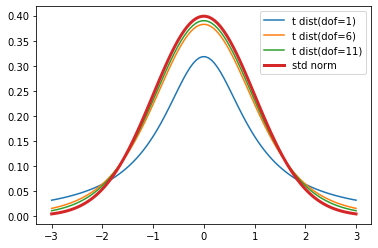

In [106]:
x = np.linspace(-3, 3, 100)
z = stats.norm().pdf(x)

for dof in range(1, 12, 5):
    t = stats.t(dof).pdf(x)
    plt.plot(x, t, label=f't dist(dof={dof})')

plt.plot(x, z, label='std norm', linewidth=3)
plt.legend()

### 実データでの区間推定

In [107]:
n = 50
column = 'tip'
alpha = 0.95
dof = n - 1

# t分布
sample_df = df.sample(n)
samples = sample_df[column]
sample_mean = samples.mean()
sample_var = stats.tvar(samples)
min_t, max_t = stats.t.interval(alpha=alpha, loc=sample_mean, scale=np.sqrt(sample_var/n), df=dof)

# 正規分布
min_norm, max_norm = stats.norm.interval(alpha=alpha, loc=sample_mean, scale=np.sqrt(sample_var/n))

print(f't分布: {min_t:.3f}~{max_t:.3f}, 正規分布: {min_norm:.3f}~{max_norm:.3f}')
print(f'Δ min(norm - t): {min_norm-min_t:.4f}, Δ max(t - norm): {max_t-max_norm:.4f}')

t分布: 2.415~3.054, 正規分布: 2.423~3.046
Δ min(norm - t): 0.0079, Δ max(t - norm): 0.0079


## 比率の差の検定（z-test）

In [108]:
z, p_value = proportions_ztest(count=[30, 33], nobs=[1000, 1000], alternative='smaller')
print(f'z値は{z}で、p値は{p_value}')

z値は-0.3840618481549573で、p値は0.35046630388746547


## 連関の検定

In [109]:
# 第一戻り値がχ2値、第二戻り値がp値、第三戻り値が自由度、第四戻り値が期待度数
obs = [[15, 5], [15, 65]]
stats.chi2_contingency(obs, correction=False)

(24.107142857142858,
 9.112167294252327e-07,
 1,
 array([[ 6., 14.],
        [24., 56.]]))

### Z検定と自由度1のχ2検定を行い、p値が同じになることを確認する

In [110]:
# 標本を2つ作成する
n = 100
sample_df1 = df.sample(n)
sample_dinner1 = len(sample_df1[sample_df1['time'] == 'Dinner'])
samples1 = [sample_dinner1, n-sample_dinner1]
sample_df2 = df.sample(n)
sample_dinner2 = len(sample_df2[sample_df2['time'] == 'Dinner'])
samples2 = [sample_dinner2, n-sample_dinner2]

# z検定
_, p_value_ztest = proportions_ztest([sample_dinner1, sample_dinner2], [n, n], alternative='two-sided')

# chi2検定
obs = [samples1, samples2]
result_chi2 = stats.chi2_contingency(obs, correction=False)
p_value_chi2 = result_chi2[1]

print(f'z検定のp値: {p_value_ztest}, chi2検定のp値: {p_value_chi2}')

z検定のp値: 0.1742313882480252, chi2検定のp値: 0.17423138824802123


In [111]:
# value_counts() を使ってもう一回解く
n = 100
column = 'time'

sample_df1 = df.sample(n)
samples1 = sample_df1[column]
sample_dinner1 = samples1.value_counts()['Dinner']
sample_df2 = df.sample(n)
samples2 = sample_df2[column]
sample_dinner2 = samples2.value_counts()['Dinner']

_, p_value_ztest = proportions_ztest([sample_dinner1, sample_dinner2], [n, n], alternative='two-sided')

sample_value1 = samples1.value_counts().values
sample_value2 = samples2.value_counts().values
obs = [sample_value1, sample_value2]
chi2_param = stats.chi2_contingency(obs, correction=False)
p_value_chi2 = chi2_param[1]

print(f'z検定のp値: {p_value_ztest}, chi2検定のp値: {p_value_chi2}')

z検定のp値: 0.8755266213290336, chi2検定のp値: 0.8755266213290337


## 平均値差の検定（t検定）

In [112]:
samples = df['tip_rate']
males_tip_rate = samples[df['sex'] == 'Male']
females_tip_rate = samples[df['sex'] == 'Female']

# student's t-test
# デフォルトで equal_var は　True、alternative は two-sided になっている （このバージョンでは alternative は指定できないようだ）
t_student, p_student = stats.ttest_ind(males_tip_rate, females_tip_rate)
# welch's t-test
# pythonで t-testを行う場合、welch's t-testを使うのが一般的 （等分散性を担保する必要がなく、大標本では z-testに近似するため）
t_welch, p_welch = stats.ttest_ind(males_tip_rate, females_tip_rate, equal_var=False)

print(f"student's t-test: t = {t_student}, p = {p_student}\nwelch's t-test: t = {t_welch}, p = {p_welch}")

student's t-test: t = -1.0833972270477996, p = 0.2797103849605489
welch's t-test: t = -1.1432770167349968, p = 0.2542456188927583


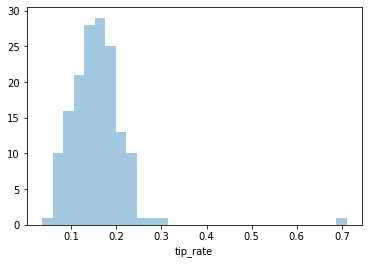

In [113]:
# データの分布も必ず確認しておく！
sns.distplot(males_tip_rate, kde=False)

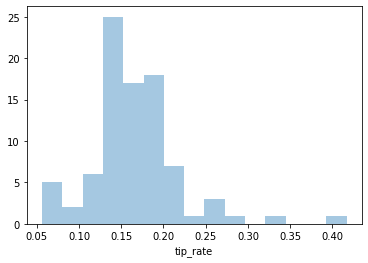

In [114]:
sns.distplot(females_tip_rate, kde=False)

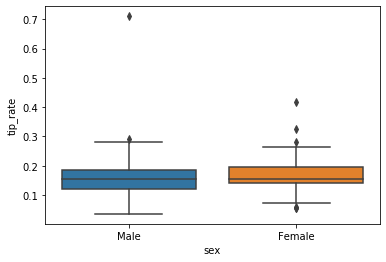

In [115]:
sns.boxplot(x='sex', y='tip_rate', data=df)

In [116]:
print(males_tip_rate.var(), females_tip_rate.var())

0.0041961727927699805 0.0028763620584040393


## Q-Qプロット

In [117]:
male_tipr = df[df['sex'] == 'Male']['tip_rate']
female_tipr = df[df['sex'] == 'Female']['tip_rate']

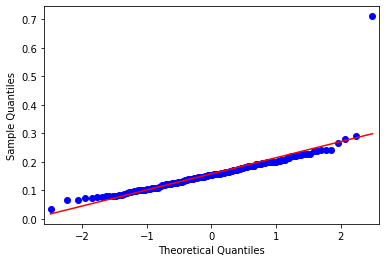

In [118]:
fig = qqplot(male_tipr, line='r')

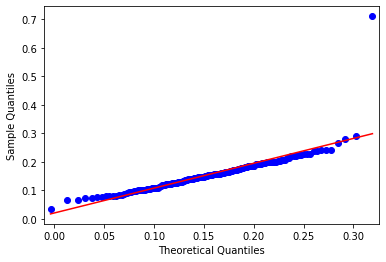

In [119]:
# male_tipr のデータの正規分布も描画してみる
mean_tip_rate = np.mean(male_tipr)
tvar_tip_rate = np.sqrt(stats.tvar(male_tipr))
fig = qqplot(male_tipr, line='r', dist=stats.norm(loc=mean_tip_rate, scale=tvar_tip_rate))

## シャピロウィルクの検定

In [120]:
male_tipr = df[df['sex'] == 'Male']['tip_rate']
female_tipr = df[df['sex'] == 'Female']['tip_rate']

In [121]:
stats.shapiro(male_tipr)

(0.7447847127914429, 3.2243281107541917e-15)

In [122]:
stats.shapiro(female_tipr)

(0.8982974290847778, 4.717996489489451e-06)

In [123]:
# 外れ値を除外してみる
np.sort(male_tipr)

array([0.03563814, 0.06565988, 0.0665336 , 0.07180385, 0.07398274,
       0.07717751, 0.07745933, 0.07861635, 0.0789266 , 0.07936508,
       0.0814664 , 0.08329863, 0.08364236, 0.08822232, 0.09001406,
       0.09452888, 0.09553024, 0.09560229, 0.09820426, 0.09935739,
       0.09984301, 0.10116338, 0.10181582, 0.10251227, 0.1035554 ,
       0.10379905, 0.10506961, 0.10620491, 0.10647182, 0.10657194,
       0.10677083, 0.10789981, 0.1117943 , 0.11607143, 0.11773472,
       0.11774956, 0.11893435, 0.12038523, 0.12128563, 0.12138869,
       0.12262416, 0.12359551, 0.12413108, 0.12468828, 0.125     ,
       0.12539185, 0.12703379, 0.1282437 , 0.12942192, 0.13031915,
       0.13049096, 0.13138686, 0.13181019, 0.13623978, 0.13636364,
       0.13649025, 0.13812155, 0.13924051, 0.13942407, 0.13965087,
       0.13978041, 0.14177694, 0.14191107, 0.14192496, 0.14278915,
       0.14482259, 0.14482259, 0.14547537, 0.14662757, 0.14669927,
       0.14705882, 0.14803849, 0.14958863, 0.14962594, 0.15008

In [124]:
# 外れ値は一番最後の要素
stats.shapiro(np.sort(male_tipr)[:-1])

# 男性のデータは帰無仮説を棄却できないため、正規分布の可能性がある

(0.9931070804595947, 0.6644759774208069)

In [125]:
np.sort(female_tipr)

array([0.05643341, 0.05679667, 0.05944673, 0.07296137, 0.07358352,
       0.08527132, 0.10252157, 0.11598237, 0.11690246, 0.11841469,
       0.12126246, 0.12338063, 0.12518629, 0.13019892, 0.13033771,
       0.13428827, 0.13553475, 0.13732098, 0.13774105, 0.13793103,
       0.13961519, 0.13998783, 0.14084507, 0.1409396 , 0.14134276,
       0.14140774, 0.14180374, 0.14285714, 0.14481094, 0.14680765,
       0.14688602, 0.14843526, 0.14935506, 0.14938236, 0.15      ,
       0.15015198, 0.15203022, 0.15243902, 0.15267176, 0.15365704,
       0.15384615, 0.15384615, 0.15521855, 0.15558149, 0.1577708 ,
       0.15974441, 0.16166505, 0.16313214, 0.16746411, 0.17133067,
       0.1721943 , 0.17391304, 0.17476489, 0.17574692, 0.17574692,
       0.17798467, 0.17964072, 0.18133491, 0.1817279 , 0.18484288,
       0.18773467, 0.18814675, 0.18839488, 0.19283747, 0.19361084,
       0.19492158, 0.19502868, 0.19505852, 0.19611415, 0.19778481,
       0.19821606, 0.19920319, 0.20034345, 0.20192308, 0.20219

In [126]:
# 0.3未満に絞ってみる
max_value = 0.3
female_tipr_adjusted = female_tipr[female_tipr < max_value]

In [127]:
stats.shapiro(female_tipr_adjusted)

# 女性のデータは帰無仮説を棄却できるため、正規分布とは言えない

(0.9696651697158813, 0.04252713546156883)

## F分布

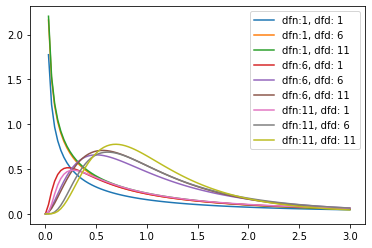

In [128]:
x = np.linspace(0, 3, 100)
for dfn in range(1, 12, 5):
    for dfd in range(1, 12, 5):
        y = stats.f.pdf(x, dfn=dfn, dfd=dfd)
        plt.plot(x, y, label=f'dfn:{dfn}, dfd: {dfd}')
plt.legend()

### F検定をやってみよう

In [129]:
male_tip_rate = df[df['sex'] == 'Male']['tip_rate']
female_tip_rate = df[df['sex'] == 'Female']['tip_rate']
male_tvar = stats.tvar(male_tip_rate)
female_tvar = stats.tvar(female_tip_rate)
male_n = len(male_tip_rate) - 1
female_n = len(female_tip_rate) - 1
f = male_tvar/female_tvar
p_value = stats.f(dfn=male_n, dfd=female_n).sf(f)

if p_value < 0.05:
    print(f'p値が{p_value:.3f}なので、帰無仮説が棄却され、等分散性がない')
else:
    print(f'p値が{p_value:.3f}なので、帰無仮説が棄却できず、等分散性がある')

p値が0.027なので、帰無仮説が棄却され、等分散性がない


## 対応のある平均値差の検定（対応のあるt検定）

In [130]:
df_bp = pd.read_csv('blood_pressure.csv')
df_bp.head(3)

,patient,sex,agegrp,bp_before,bp_after
0,1,Male,30-45,143,153
1,2,Male,30-45,163,170
2,3,Male,30-45,153,168


In [131]:
bp_before = df_bp['bp_before']
bp_after = df_bp['bp_after']
t_value, p_value = stats.ttest_rel(bp_before, bp_after)

if p_value < 0.05:
    print(f'p値は{p_value:.3f}なので、有意差あり')
else:
    print(f'p値は{p_value:.3f}なので、有意差なし')

print(f't: {t_value:.3f}')

p値は0.001なので、有意差あり
t: 3.337


In [132]:
df_bp['delta'] = df_bp['bp_before'] - df_bp['bp_after']
df_bp.head(3)

,patient,sex,agegrp,bp_before,bp_after,delta
0,1,Male,30-45,143,153,-10
1,2,Male,30-45,163,170,-7
2,3,Male,30-45,153,168,-15


In [133]:
df_bp['delta'].mean()

5.091666666666667

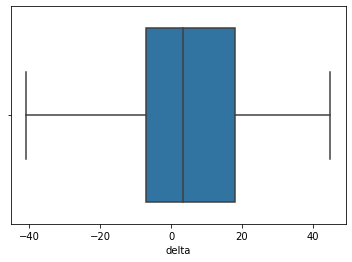

In [134]:
sns.boxplot(df_bp['delta'])

In [135]:
# t分布の確率密度関数からp値を計算するとしたら
p_value2 = stats.t(len(df_bp)-1).sf(t_value)
p_value2

0.0005648957322420411

## Cohen's d

In [139]:
def cohen_d(x, y):
    n_1 = len(x)
    tvar_1 = stats.tvar(x)
    n_2 = len(y)
    tvar_2 = stats.tvar(y)
    estimated_sd = np.sqrt((n_1*tvar_1 + n_2*tvar_2) / (n_1 + n_2 - 2))
    return (np.mean(x) - np.mean(y)) / estimated_sd

In [144]:
# 男女のチップ率の効果量を求める
males_tip_rate = df[df['sex'] == 'Male']['tip_rate']
females_tip_rate = df[df['sex'] == 'Female']['tip_rate']

effect_size = cohen_d(males_tip_rate, female_tip_rate)
effect_size

-0.1442371473754911

### 検定力を求める

In [153]:
power = TTestIndPower()
power_tip_rate = power.solve_power(effect_size=effect_size,
                                   nobs1=len(male_tip_rate),
                                   alpha=0.05,
                                   power=None,
                                   ratio=len(female_tip_rate)/len(male_tip_rate),
                                   alternative='two-sided')

power_tip_rate

0.18926300379893515

### 必要な標本の大きさを求める

In [158]:
sample_size = power.solve_power(effect_size=effect_size,
                                nobs1=None,
                                alpha=0.05,
                                power=0.8,
                                ratio=len(female_tip_rate)/len(male_tip_rate),
                                alternative='two-sided')

sample_size

1059.3281039950289

## 検定力の推移

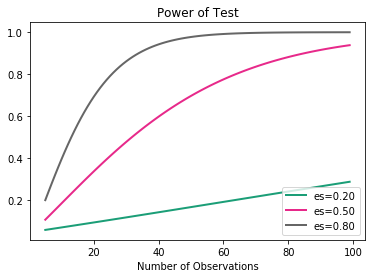

In [160]:
fig = power.plot_power(dep_var='nobs', nobs=np.arange(5, 100), effect_size=[0.2, 0.5, 0.8], alpha=0.05)